# Gráficas de colores

La idea era revisar las paletas de colores de **TailwindCSS**, ver los componentes como **R**, **G** y **B**, y ver si se podía hacer algo con ellas. También revisar funciones como Interpolación Lineal para generar una paleta de colores, tomando como base el color "suave" hasta el color "fuerte/oscuro".

## Librerías necesarias

```python
import matplotlib.pyplot as plt
import json
from random import randint  
```

### Importamos las librerías necesarias

In [1]:
import matplotlib.pyplot as plt
import json
from random import randint  

DATA_FILE = 'data/data.json'

### Funciones de ayuda

Se definieron algunas funcionas para manejar de manera más sencilla los colores, como por ejemplo, convertir de RGB a Hexadecimal, o de Hexadecimal a RGB.

In [2]:
# ===== Color Transformations =====
def hexToRgb(hex):
    hex = hex.lstrip('#')
    hlen = len(hex)
    return tuple(int(hex[i:i+hlen//3], 16) for i in range(0, hlen, hlen//3))

def rgbToHex(rgb):
    return '#%02x%02x%02x' % rgb

# ===== Color Operations =====
def interpolation(color_1, color_2, t):
    """
    Interpolates between two colors in RGB space.
    The parameter t is a float between 0 and 1.
    """
    return [int(color_1[i] + (color_2[i] - color_1[i]) * t) for i in range(3)]

def interpolation_smooth(color_1, color_2, t):
    """
    Interpolates between two colors in RGB space using smoothstep interpolation.
    The parameter t is a float between 0 and 1.
    """
    t_smooth = smoothstep(t)
    return [int(color_1[i] + (color_2[i] - color_1[i]) * t_smooth) for i in range(3)]

def interpolation_custom(func: list, color_1, color_2, t): 
    """
    func: list of functions to apply to each color channel
    Interpolates between two colors in RGB space using custom interpolation.
    The parameter t is a float between 0 and 1.
    """
    return [int(color_1[i] + (color_2[i] - color_1[i]) * func[i](t)) for i in range(3)]

# ===== Helper for steps =====
def smoothstep(t):
    return t * t * (3 - 2 * t)

def linearstep(t):
    return t

In [3]:

# ===== Color Plots =====
def plotColors(arr_color): # [(r,g,b), (r,g,b), ...]
    """
    Shows a color in RGB space.
    """
    fig, ax = plt.subplots(figsize=(16, 1))
    ax.imshow([arr_color])
    ax.set_axis_off()
    plt.show()

def plotLineColor(title, arr_color_X, arr_color_Y):
    """
    Plot a line for each color in R, G and B.
    """
    
    fig, ax = plt.subplots(figsize=(16, 8))
    # Info
    ax.set_title(title + " - " + str(len(arr_color_Y)) + " tramos" )
    ax.set_xlabel('Tramo')
    ax.set_ylabel('Color (RGB)')
    # Show x ticks based on arr_color_X; 50, 100, 200...
    ax.set_xticks([i for i in range(len(arr_color_X))]);
    ax.set_xticklabels(arr_color_X)
    # Show grid
    ax.grid(True)
    ax.grid(color='gray', linestyle='-', linewidth=0.2)
    # Plot
    for idx, RGB in enumerate(['R', 'G', 'B']):
        ax.plot([ arr_color_Y[i][idx] for i in range(len(arr_color_Y)) ], color=RGB.lower())

    ax.legend(['R', 'G', 'B'])

    # For each color, do annotation
    for idx, color in enumerate(arr_color_Y):
        # Revisamos que colores son menores y los ordenamos para que la flecha no se vea mal
        order_color = sortIndex( [color[0], color[1], color[2]] )
        incremental_color = getIncrementalColor(order_color, color) # if order_color is [0,1,2] (ascendent) ->  [(x, 0, 0), (x, y, 0), (x, y, z))]

        for i, current_color in enumerate(order_color[::-1]):
            ax.annotate('',
                        xy=( idx, 0), xycoords='data',
                        xytext=(idx, color[current_color]), textcoords='data',
                        arrowprops=dict(arrowstyle="|-|",
                                        connectionstyle="arc3",
                                        color=rgbToHex(incremental_color[i]),
                                        linewidth=1.5))
    plt.show()

# Plot each value of arr_sums_RGB, size based on the sum
def plotScatterSingleColor(data, arr_sums_RGB, arr_plot_X, arr_plot_Y): # 0: red, 1: green, 2: blue
    fig, ax = plt.subplots(3,1,figsize=(20, 18))
    RGB = ['red', 'green', 'blue']

    for idx, _current_color in enumerate(RGB):
        for i in range(len(arr_sums_RGB)):
            for j in range(len(arr_sums_RGB[i])):
                ax[idx].scatter(
                    i,
                    j,
                    color = _current_color,
                    s=arr_plot_Y[i][j][idx]
                )
        ax[idx].set_title(f"{_current_color} (basado en el tamaño)", size=20)
        ax[idx].set_yticks([i for i in range(len(arr_plot_X[i]))]);
        ax[idx].set_ylabel("Tramo", size=16)
        ax[idx].set_yticklabels(arr_plot_X[i])
        ax[idx].set_xlabel("Color", size=16)
        ax[idx].set_xticks([i for i in range(len(data))]);
        ax[idx].set_xticklabels([data[i]["name"] for i in range(len(data))]);

# ===== Helper for Plotting Line =====
def getIncrementalColor(order, arr_color):
    """
    Returns a list of incremental colors based on the given color.
    """
    incremental_color = []
    incremental_color_1 = [0,0,0]
    # ejemplo si [0,2,1] , deberiamos rellenar primero  el 0, luego el 2 y luego el 1
    # [(x, 0, 0), (x, 0, z), (x, y, z)]
    order = order[::-1]
    # print(order)
    for i in order:
        incremental_color_1[i] = arr_color[i]
        incremental_color.append(tuple(incremental_color_1))

    return incremental_color

def sortIndex(arr):
    """
    sort arr but return indexes
    """
    return sorted(range(len(arr)), key=lambda k: arr[k])

### Utilizamos 3 colores de ejemplo

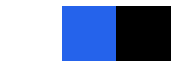

In [4]:
# linearInteporlation based on two colors
color_1 = hexToRgb('#ffffff');
color_2 = hexToRgb('#2563eb');
color_3 = hexToRgb('#000000');
plotColors([color_1,color_2,color_3])

### Hacemos la interpolación lineal

In [5]:
def zz(color_1, color_2, t):
    """
    Interpolates between two colors in RGB space.
    The parameter t is a float between 0 and 1.
    """
    return [int(color_1[i] + (color_2[i] - color_1[i]) * t) for i in range(3)]

__r = 3
inn_ = [ zz ( [0,0,0], [255,255,255], t/__r ) for t in range(__r) ]
print(inn_)

[[0, 0, 0], [85, 85, 85], [170, 170, 170]]


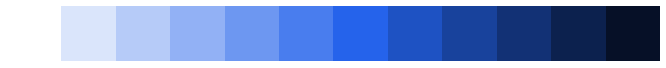

In [6]:
_range = 6
# Interpolation 
# ----- color_1 -> color_2
# ----- color_2 -> color_3

in_1 = [ interpolation(color_1, color_2, t / _range) for t in range(_range) ]
in_2 = [ interpolation(color_2, color_3, t / _range) for t in range(_range) ]

# Plot
plotColors(in_1 + in_2)

### Cargamos el dataset de colores de TailwindCSS

Se cargan los datos y se parsean a un formato **RGB**. Además de dejar los datos de interés en arreglos, para así poder graficarlos de manera más sencilla

In [7]:
# Import data
with open(DATA_FILE, 'r') as f:
    data = json.load(f)

arr_plot_X = []
arr_plot_Y = []
for idx_set, color_set in enumerate(data):
    # print(color_set)

    arr_temp_plot_X = []
    arr_temp_plot_Y = []
    for idx_color, color_info in enumerate(color_set['data']):
        data[idx_set]['data'][idx_color]['color'] = hexToRgb(color_info['color'])
        arr_temp_plot_X.append(color_info['tramo'])
        arr_temp_plot_Y.append(color_info['color'])

    arr_plot_X.append(arr_temp_plot_X)
    arr_plot_Y.append(arr_temp_plot_Y)

### Ejemplo gráfica para el índice 5, Rojo

In [8]:
idx = 5
idx_color = 5
print("Nombre:\t", data[idx]['name'])
print("Tramo:\t", data[idx]['data'][idx_color]['tramo'])
print("Color:\t", data[idx]['data'][idx_color]['color'])

Nombre:	 Red
Tramo:	 500
Color:	 (239, 68, 68)


Plot:	 [(254, 242, 242), (254, 226, 226), (254, 202, 202), (252, 165, 165), (248, 113, 113), (239, 68, 68), (220, 38, 38), (185, 28, 28), (153, 27, 27), (127, 29, 29), (69, 10, 10)]
Plot:	 ['50', '100', '200', '300', '400', '500', '600', '700', '800', '900', '950']


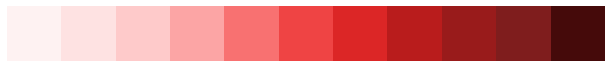

In [9]:
print("Plot:\t", arr_plot_Y[idx])
print("Plot:\t", arr_plot_X[idx])
plotColors(arr_plot_Y[idx])

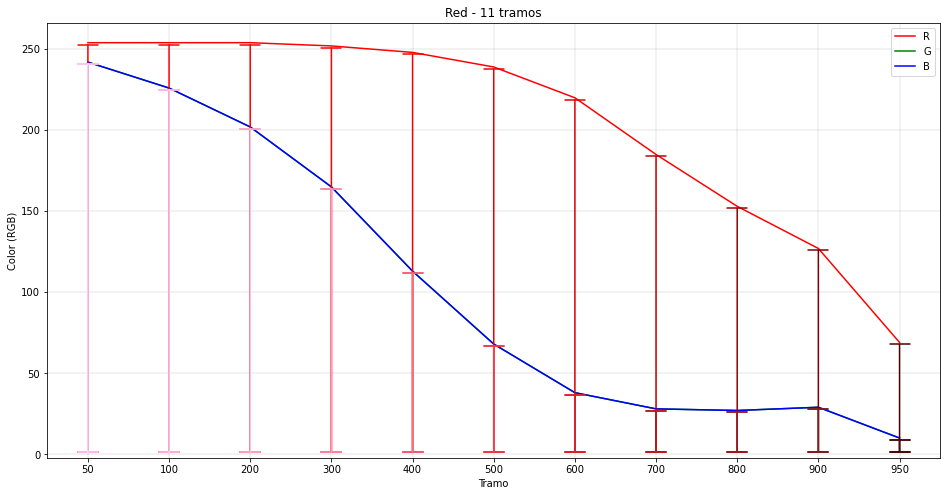

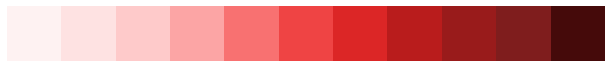

In [10]:
plotLineColor(data[idx]['name'], arr_plot_X[idx], arr_plot_Y[idx])
plotColors(arr_plot_Y[idx])

### Graficamos todos

De manera arbitraria, se grafican los componentes **R**, **G** y **B** de los set de colores (22 en total)

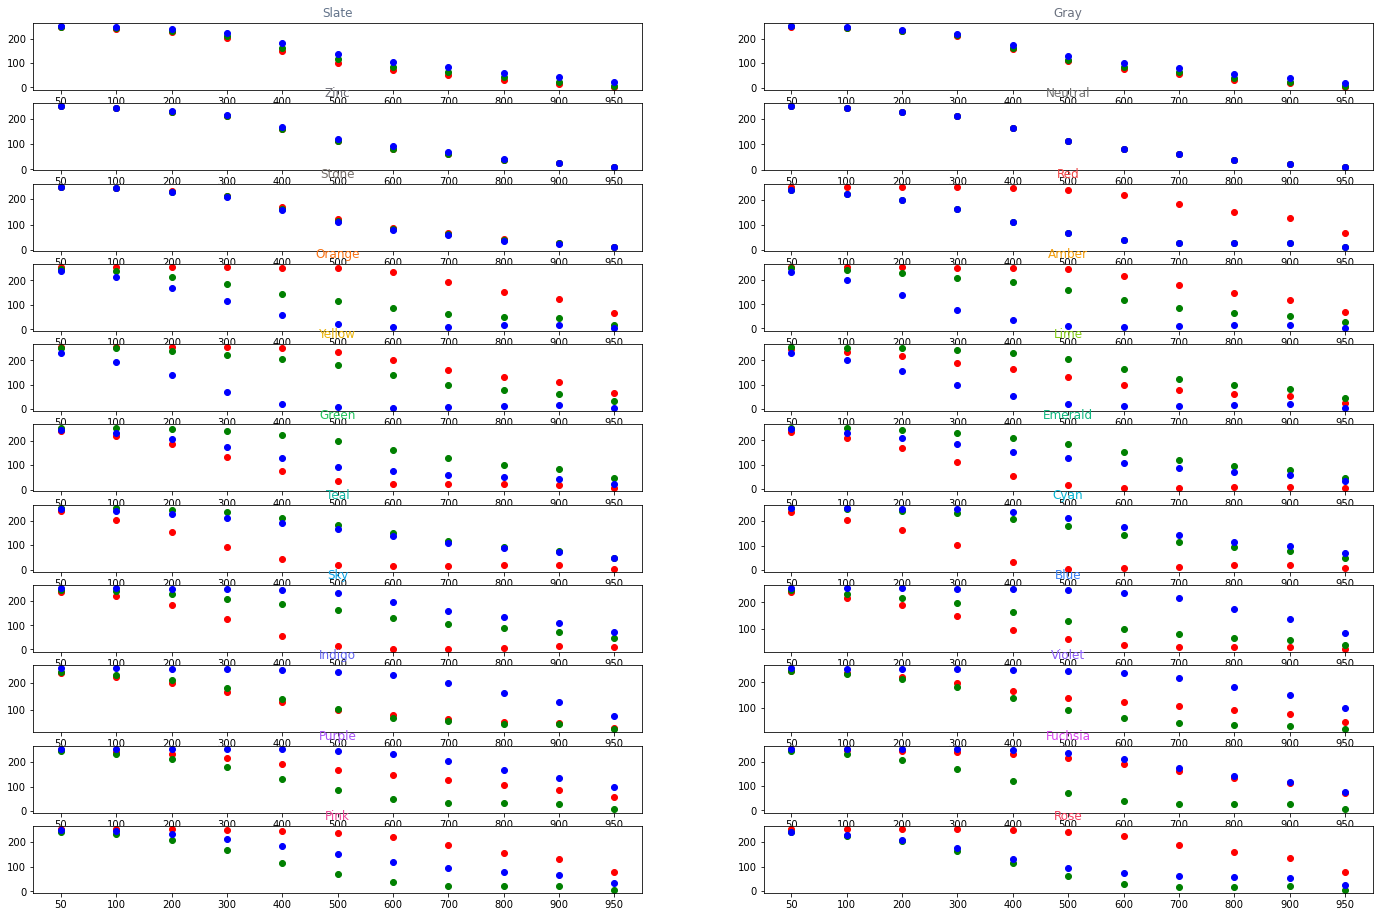

In [11]:
# Plot first color set
# fig 11x2 (size of ax[0] = 11, size of ax[1] = 2)
fig, ax = plt.subplots(11,2, figsize=(24, 16))
RGB = ['red', 'green', 'blue']
pos_set = 0
for i in range(11):
    for j in range(2):
        # ax[i][j].set_axis_off()
        for idx, color in enumerate(RGB):
            ax[i][j].scatter(
                arr_plot_X[pos_set],
                [value[idx] for value in arr_plot_Y[pos_set]],
                color=color
            )
            ax[i][j].set_title(data[pos_set]['name'], color=rgbToHex(data[pos_set]['data'][5]['color']))
        pos_set += 1

### Suma de los componentes R+G+B de cada set de colores y graficamos

In [12]:
arr_sums_RGB = []
# Calcular la suma de arr_plot_Y[0][0] + arr_plot_Y[0][1] + arr_plot_Y[0][2]...
for j in range(len(arr_plot_Y)):
    arr_sums_temp = []
    print(data[j]['name'], end='\t\t')
    for i in range(len(arr_plot_Y[0])):
        _sum = arr_plot_Y[j][i][0] + arr_plot_Y[j][i][1] + arr_plot_Y[j][i][2]
        print(_sum, end=' ')
        arr_sums_temp.append(_sum)
    arr_sums_RGB.append(arr_sums_temp)
    print()

Slate		750 735 698 641 495 355 261 201 130 80 31 
Gray		750 733 695 641 494 349 259 201 127 80 28 
Zinc		750 733 687 640 492 348 255 196 120 75 29 
Neutral		750 735 687 636 489 345 246 192 114 69 30 
Stone		749 734 688 634 488 341 248 192 114 76 31 
Red		738 706 658 582 474 375 296 241 207 185 89 
Orange		739 705 639 555 457 386 334 271 224 187 94 
Amber		741 696 621 540 478 414 342 272 224 188 98 
Yellow		738 698 632 548 475 421 344 266 224 194 104 
Lime		732 691 623 532 446 358 277 216 179 157 77 
Green		737 703 642 545 424 325 259 210 175 148 73 
Emerald		734 688 618 524 416 330 260 211 171 143 80 
Teal		743 696 627 540 448 370 297 243 200 171 97 
Cyan		745 711 660 584 483 400 331 274 232 199 127 
Sky		744 720 669 588 493 412 333 269 229 196 128 
Blue		740 707 664 597 511 435 371 323 269 226 144 
Indigo		735 710 663 597 517 442 378 325 266 224 132 
Violet		743 724 689 630 556 477 419 366 306 254 163 
Purple		750 730 701 650 576 500 432 366 308 251 166 
Fuchsia		752 737 707 663 602 5

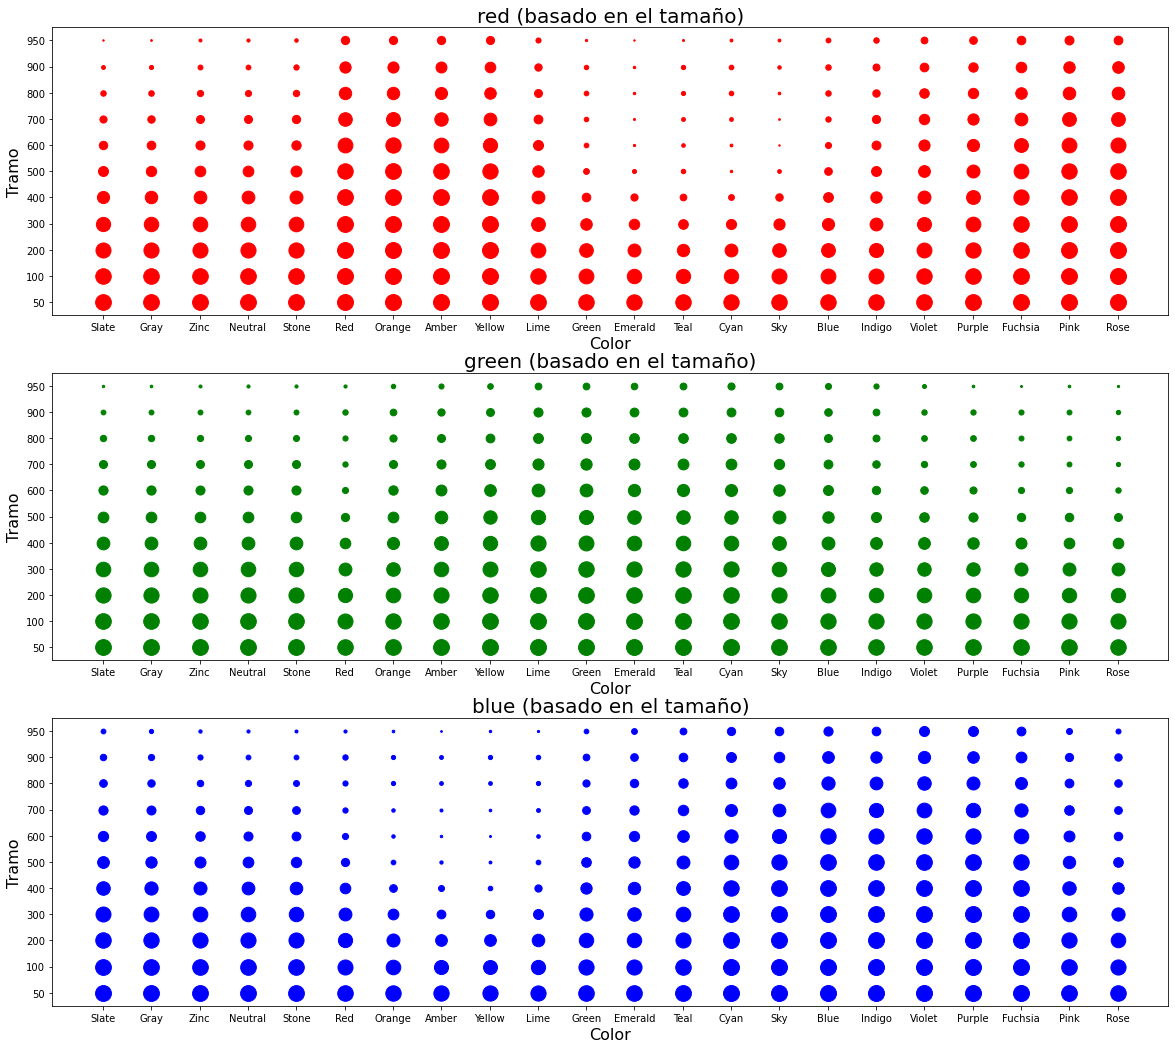

In [13]:
plotScatterSingleColor(data, arr_sums_RGB, arr_plot_X, arr_plot_Y)

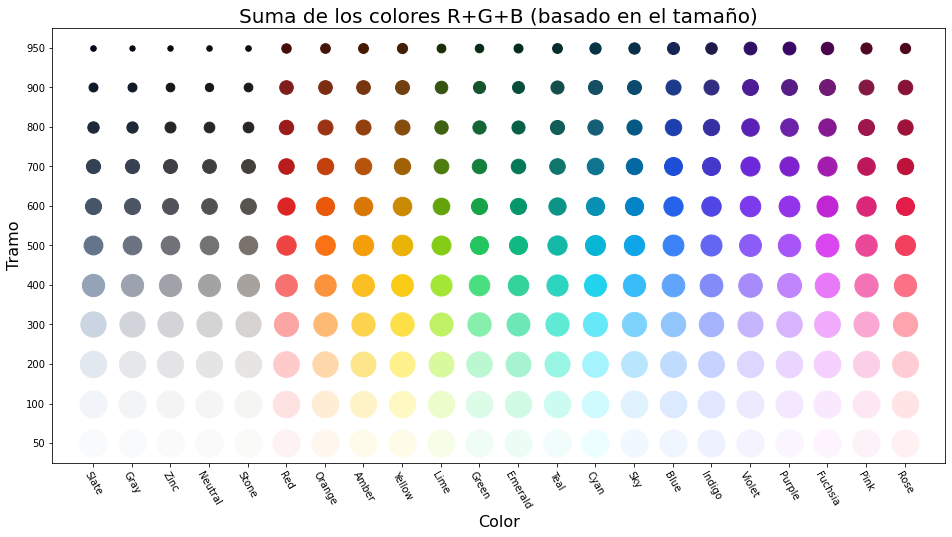

In [14]:
# Plot each value of arr_sums_RGB, size based on the sum
fig, ax = plt.subplots(figsize=(16, 8))
for i in range(len(arr_sums_RGB)):
    for j in range(len(arr_sums_RGB[i])):
        ax.scatter(
            i,
            j,
            color = rgbToHex(arr_plot_Y[i][j]),
            s=arr_sums_RGB[i][j]
        )
ax.set_title("Suma de los colores R+G+B (basado en el tamaño)", size=20)
ax.set_yticks([i for i in range(len(arr_plot_X[i]))]);
ax.set_ylabel("Tramo", size=16)
ax.set_yticklabels(arr_plot_X[i])
ax.set_xlabel("Color", size=16)
ax.set_xticks([i for i in range(len(data))]);
ax.set_xticklabels([data[i]["name"] for i in range(len(data))]);
plt.xticks(rotation=-60);

### Más en detalle...

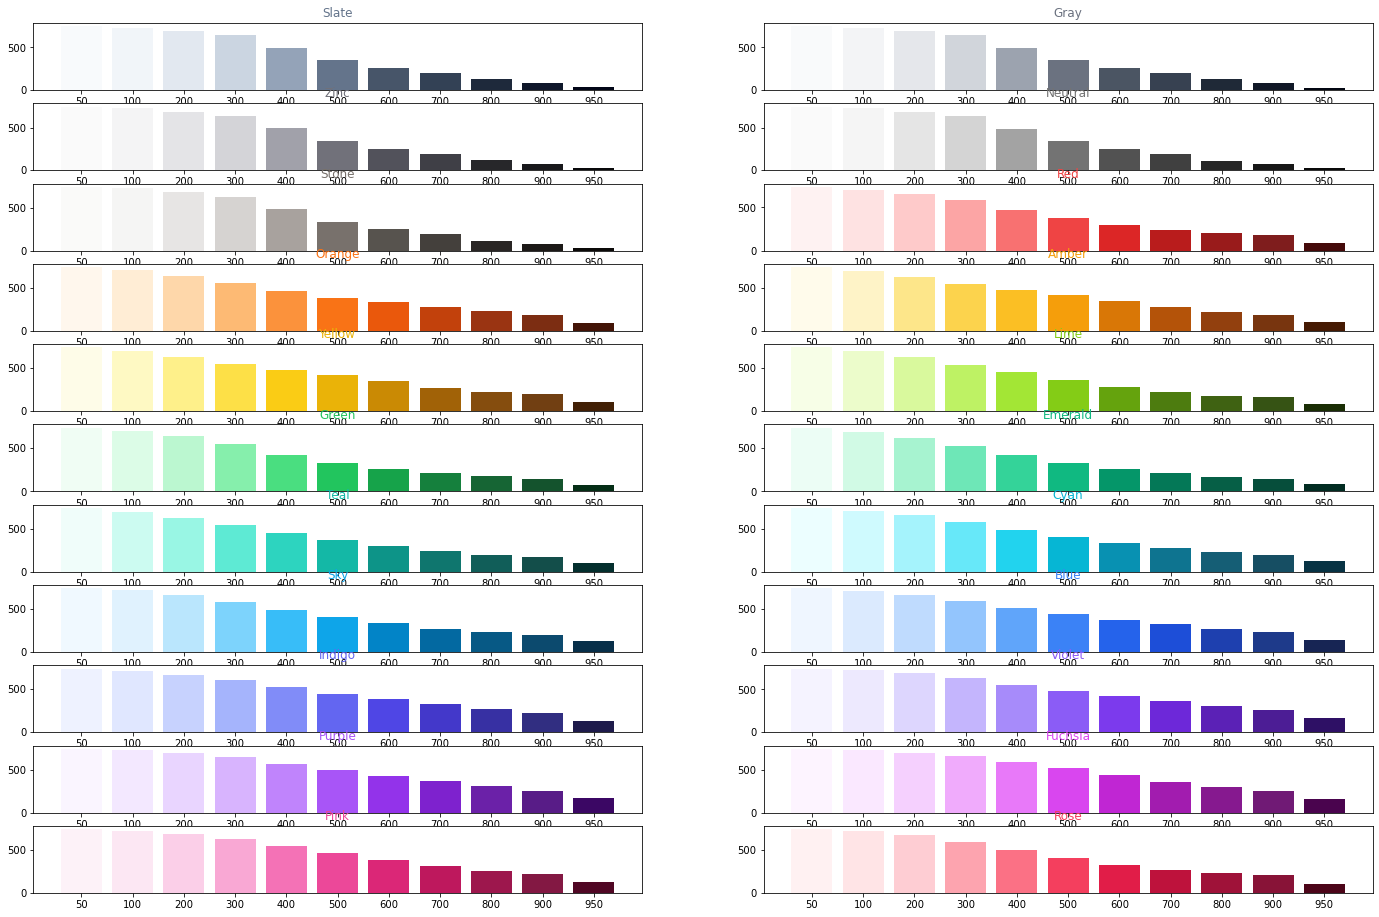

In [15]:
# Plot color set based on sum of RGB for each "tramo"
fig, ax = plt.subplots(11,2, figsize=(24, 16))

pos_set = 0
for i in range(11):
    for j in range(2):
        idxxx = [a for a in range(len(arr_plot_Y[pos_set]))]
        colores = [rgbToHex(data[pos_set]['data'][idxxx[i]]['color']) for i in range(len(arr_plot_Y[pos_set]))]
        ax[i][j].bar(

            arr_plot_X[pos_set],
            arr_sums_RGB[pos_set],
            color=colores
        )
            
        ax[i][j].set_title(data[pos_set]['name'], color=rgbToHex(data[pos_set]['data'][5]['color']))
        pos_set += 1

### Diferencia de los componentes R+G+B de cada set de colores y graficamos

In [16]:
# Plot color set based on difference of RGB for each "tramo"
# [0] = [0] - [1]
# [i] = [i] - [i+1]
arr_sums_RGB_diff = [] 
for i in range(len(arr_sums_RGB)):
    arr_sums_RGB_diff_temp = []
    for j in range(len(arr_sums_RGB[i]) -1):
        arr_sums_RGB_diff_temp.append(arr_sums_RGB[i][j] - arr_sums_RGB[i][j+1])
    arr_sums_RGB_diff.append(arr_sums_RGB_diff_temp)
    
arr_sums_RGB_diff

[[15, 37, 57, 146, 140, 94, 60, 71, 50, 49],
 [17, 38, 54, 147, 145, 90, 58, 74, 47, 52],
 [17, 46, 47, 148, 144, 93, 59, 76, 45, 46],
 [15, 48, 51, 147, 144, 99, 54, 78, 45, 39],
 [15, 46, 54, 146, 147, 93, 56, 78, 38, 45],
 [32, 48, 76, 108, 99, 79, 55, 34, 22, 96],
 [34, 66, 84, 98, 71, 52, 63, 47, 37, 93],
 [45, 75, 81, 62, 64, 72, 70, 48, 36, 90],
 [40, 66, 84, 73, 54, 77, 78, 42, 30, 90],
 [41, 68, 91, 86, 88, 81, 61, 37, 22, 80],
 [34, 61, 97, 121, 99, 66, 49, 35, 27, 75],
 [46, 70, 94, 108, 86, 70, 49, 40, 28, 63],
 [47, 69, 87, 92, 78, 73, 54, 43, 29, 74],
 [34, 51, 76, 101, 83, 69, 57, 42, 33, 72],
 [24, 51, 81, 95, 81, 79, 64, 40, 33, 68],
 [33, 43, 67, 86, 76, 64, 48, 54, 43, 82],
 [25, 47, 66, 80, 75, 64, 53, 59, 42, 92],
 [19, 35, 59, 74, 79, 58, 53, 60, 52, 91],
 [20, 29, 51, 74, 76, 68, 66, 58, 57, 85],
 [15, 30, 44, 61, 76, 85, 76, 63, 47, 99],
 [17, 36, 61, 89, 79, 84, 70, 50, 35, 99],
 [25, 43, 78, 95, 96, 75, 58, 34, 24, 104]]

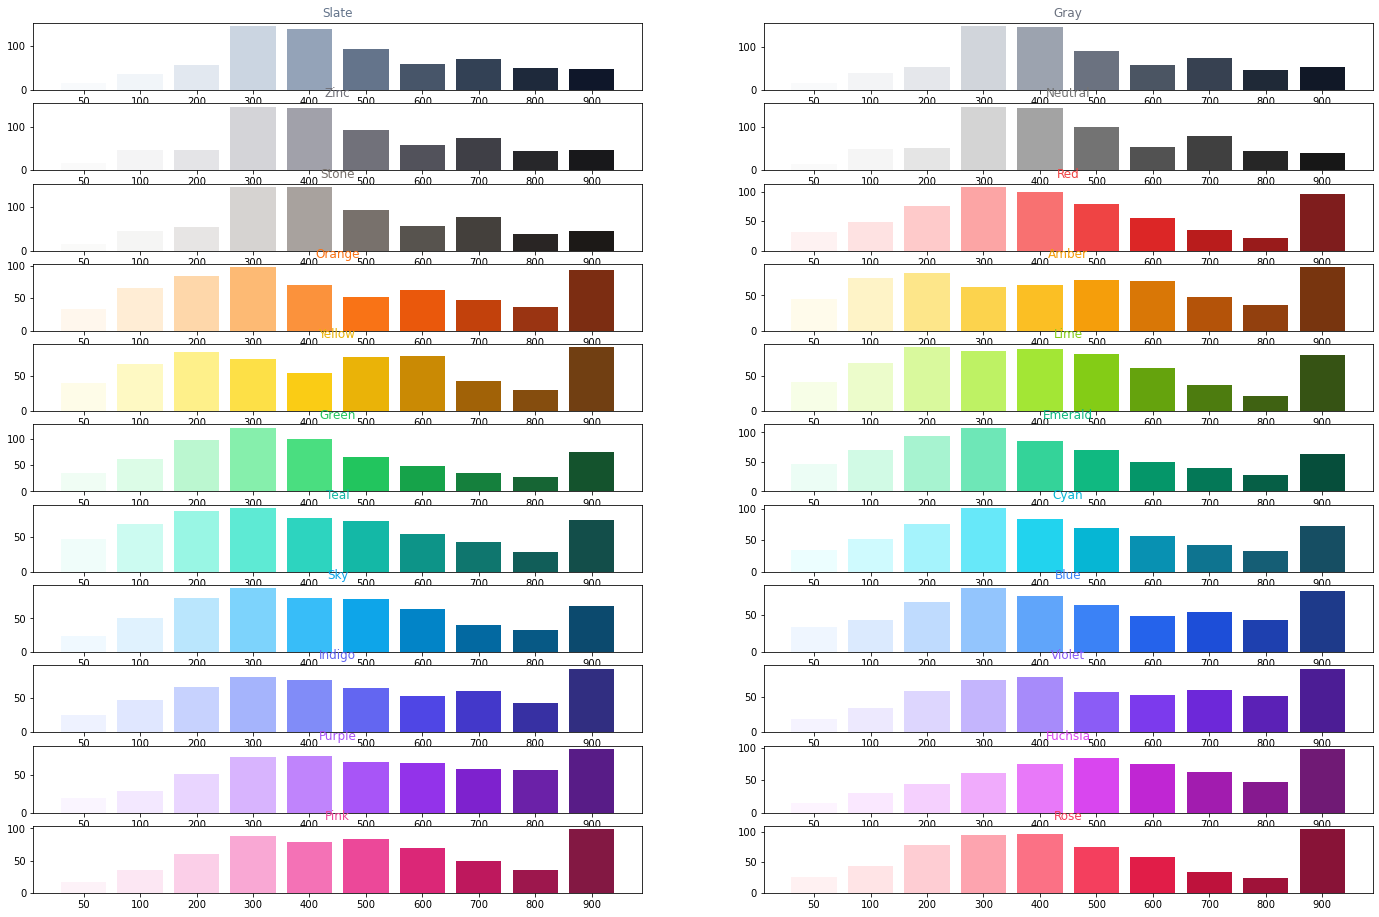

In [17]:
# Print mm_diff
fig, ax = plt.subplots(11,2, figsize=(24, 16))

pos_set = 0
for i in range(11):
    for j in range(2):
        idxxx = [a for a in range(len(arr_plot_Y[pos_set]))]
        colores = [rgbToHex(data[pos_set]['data'][idxxx[i]]['color']) for i in range(len(arr_plot_Y[pos_set]))]
        ax[i][j].bar(

            arr_plot_X[pos_set][:-1],
            arr_sums_RGB_diff[pos_set],
            color=colores[:-1]
        )
            
        ax[i][j].set_title(data[pos_set]['name'], color=rgbToHex(data[pos_set]['data'][5]['color']))
        pos_set += 1

### ¿Qué ocurre al utilizar los datos de la interpolación lineal?

Los valores de las diferencias son bastante planos, por lo que las gradientes de colores pueden no ser tan buenas como se esperaba.

In [18]:
fx = [ sum(i) for i in in_1 + in_2 ]
fx_dif = [ fx[i] - fx[i+1] for i in range(len(fx) - 1) ]
fx_dif

[67, 65, 65, 67, 65, 65, 64, 61, 62, 61, 62]

### ¿Qué se puede hacer?

In [19]:
# Using arr_sums_RGB_diff,
# arr_sums_RGB_diff
# arr_sums_RGB

In [20]:
# Get mean of column (based on each "tramo")
def mean_matrix(matriz):
    m = len(matriz)
    n = len(matriz[0]) if m > 0 else 0

    _mean = []

    for j in range(n):
        suma_columna = sum(matriz[i][j] for i in range(m))
        _mean_col = int(suma_columna / m)
        _mean.append(_mean_col)

    print(_mean)
    return _mean

arr_sums_RGB_diff_mean = mean_matrix(arr_sums_RGB_diff)
arr_sums_RGB_mean = mean_matrix(arr_sums_RGB)

[27, 50, 70, 101, 94, 76, 59, 52, 37, 76]
[742, 715, 664, 594, 493, 398, 322, 262, 209, 172, 95]


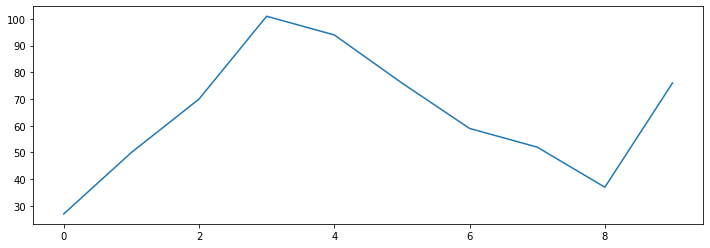

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(arr_sums_RGB_diff_mean);

### Todos los set de colores siguen una tendencia aproximada

Además cada set de colores tiene algún color predominante en el espectro **RGB**, basado en esto podríamos generar números aleatorios y darle cierta prioridad.

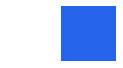

In [22]:
c_1 = hexToRgb('#ffffff');
c_2 = hexToRgb('#2563eb');
plotColors([c_1,c_2])

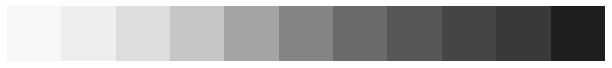

In [23]:
# We are going to consider a baseline , for each tramo 50, 100, 200 ... 900, 950 (11)
# Every sub_array will be like [(250,250,250), (.,.,.),
# For this base line, we are going to use the mean array # arr_sums_RGB_mean
baseline = [ [i//3,i//3,i//3] for i in arr_sums_RGB_mean]
plotColors(baseline)

### En base a los promedios generados, se puede generar una paleta de colores

In [24]:
def new_set_color(baseline, factor, rand_num_min, rand_num, arr_sums_RGB_diff_mean):
    """
    baseline: [[r,g,b], [r,g,b], ...]
    factor: [0.1, 0.3, 0.5] - r,g,b
    rand_num_min: [0, 0, 0] . r,g,b
    rand_num: [10, 10, 10] - r,g,b
    """
    for idx, _ in enumerate(baseline):
        for i in range(len(baseline[idx])):
            if idx == 0:
                # nothing
                continue
            else:
                # Using the mean array, <[27, 50, 70, 101, 94, 76, 59, 52, 37, 76]> we know the difference is 27, 50 ...
                # Now we can multiply the difference by the factor
                # and add a random number between rand_num_min and rand_num
                _num =  int(arr_sums_RGB_diff_mean[idx-1] * factor[i] + (randint(rand_num_min[i], rand_num[i])))
                # _num should be between 0 and 255
                baseline[idx][i] += _num
                if baseline[idx][i] > 255:
                    baseline[idx][i] = 255
                elif baseline[idx][i] < 0:
                    baseline[idx][i] = 0
    return baseline

### Para ello asignamos ciertos pesos a cada componente

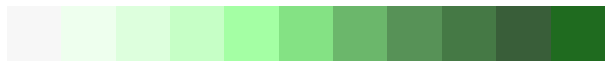

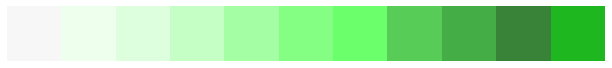

In [25]:
baseline = [ [i//3,i//3,i//3] for i in arr_sums_RGB_mean]
# Prio based on position, 0 = R, 1 = G, 2 = B
factor = [.0, 1, .0]; rand_num_min = [0, 0, 0]; rand_num = [0, 0, 0] # R, G, B
plotColors(new_set_color(baseline, factor, rand_num_min, rand_num, arr_sums_RGB_diff_mean))
# Two iterations
plotColors(new_set_color(baseline, factor, rand_num_min, rand_num, arr_sums_RGB_diff_mean))

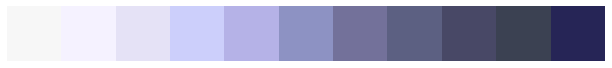

[[247, 247, 247], [245, 242, 255], [229, 226, 246], [204, 207, 251], [181, 178, 231], [141, 146, 195], [115, 113, 154], [92, 96, 130], [72, 72, 102], [59, 65, 82], [38, 37, 86]]
[741, 742, 701, 662, 590, 482, 382, 318, 246, 206, 161]


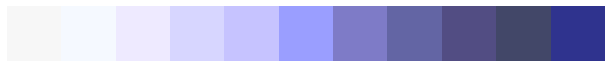

In [26]:
baseline = [ [i//3,i//3,i//3] for i in arr_sums_RGB_mean]
# Prio based on position, 0 = R, 1 = G, 2 = B
factor = [.15, 0.15,.7]; rand_num_min = [-5, -5, -10]; rand_num = [3, 3, 5] # R, G, B
plotColors(new_set_color(baseline, factor, rand_num_min, rand_num, arr_sums_RGB_diff_mean))
print(baseline)
print([sum(i) for i in baseline])
# Two iterations
plotColors(new_set_color(baseline, factor, rand_num_min, rand_num, arr_sums_RGB_diff_mean))
#[742, 715, 664, 594, 493, 398, 322, 262, 209, 172, 95]

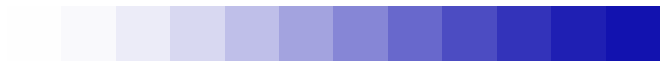

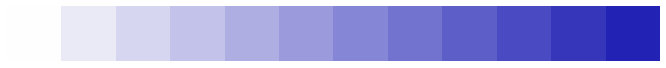

In [27]:
_range = 12
color_1 = hexToRgb('#fefefe');
color_2 = hexToRgb('#0e0eae');
grad_blue_l = [ interpolation_smooth(color_1, color_2, t / _range) for t in range(_range) ]
grad_blue_s = [ interpolation(color_1, color_2, t / _range) for t in range(_range) ]
plotColors(grad_blue_l)
plotColors(grad_blue_s);

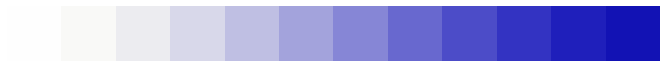

In [28]:
_range = 12
def smoothstep_(t):
    return t * t * (3 - (2 * t))
mix_ = [ interpolation_custom([smoothstep_, smoothstep, linearstep], color_1, color_2, t / _range) for t in range(_range) ]
plotColors(mix_)

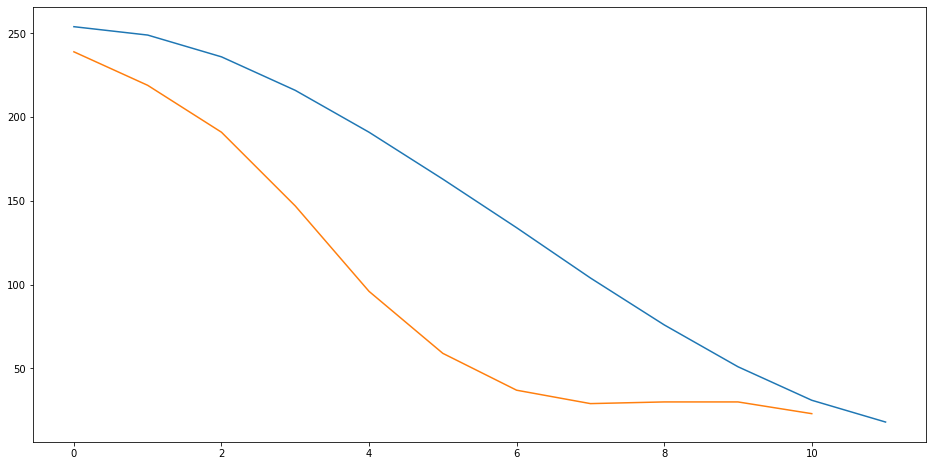

In [29]:
_range = 12
color_1 = hexToRgb('#fefefe');
color_2 = hexToRgb('#0e0eae');

fig,ax = plt.subplots(figsize=(16, 8))

ax.plot([i[0] for i in mix_] )
ax.plot([i[0] for i in arr_plot_Y[15]])
